# predicting the employe retention logistic regression

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split# training
from sklearn.linear_model import LogisticRegression # logistic regression library
from sklearn.metrics import confusion_matrix # model eval
import matplotlib.pyplot as plt# visuals
from sklearn.metrics import accuracy_score # to evaluate how accurate model is
import seaborn as sns# visuals
from sklearn.preprocessing import LabelEncoder # import label encoders to handle non numerical data

In [ ]:
df=pd.read_csv('/content/HR_comma_sep (1).csv.crdownload')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Concert string (non numerical ) to numerical value of salary and department

In [ ]:
# create a label encoder object
# LabelEncoder assigns a unique number to each category.
# instead of doing ir manually it does automatically using this fuction
le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Salary
0,0.38,0.53,2,157,3,0,1,0,7,1,1
1,0.80,0.86,5,262,6,0,1,0,7,2,2
2,0.11,0.88,7,272,4,0,1,0,7,2,2
3,0.72,0.87,5,223,5,0,1,0,7,1,1
4,0.37,0.52,2,159,3,0,1,0,7,1,1


In [ ]:
# seperate features and target variables

# seems liek every features is important so we take them

X=df.drop('left',axis=1) # droping left and taking all as our x cauz left is already our label (y)
y=df['left']

#Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#Call Logistic Function and train

In [ ]:
model=LogisticRegression()
# cauz we r training logistic so we use the train data not test
model.fit(X_train,y_train) # use train

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Make Prediction

In [ ]:
y_pred=model.predict(X_test) # we r giving x_test (actual data ) to y_predict to predcit
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {round(accuracy,2)}')

Accuracy : 0.76


## Create Confusuion Matrix

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred) # predicting the target with actual data and predicted




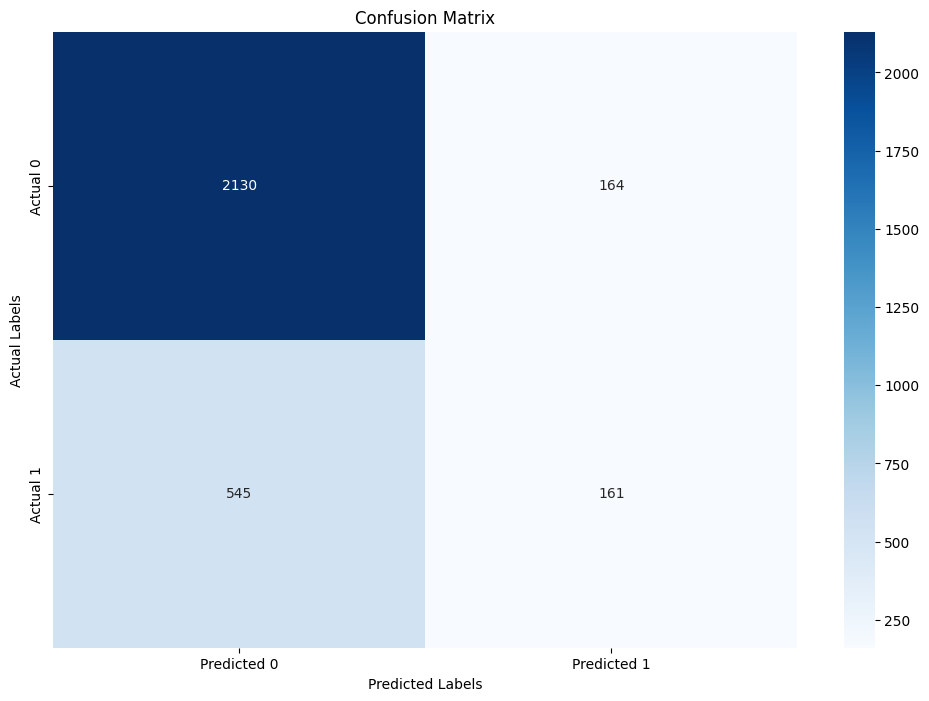

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])

plt.xticklabels('Predicted Labels')
plt.yticklabels('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [ ]:
# LOGISTIC REGRESSION WORKS WELL WITH LINEAR DATA , THERE FOR WE HAVE TO CHECK IF THE DATA IS LINEAR TO EACH OTHER

In [ ]:
corr=df.corr()

<Axes: >

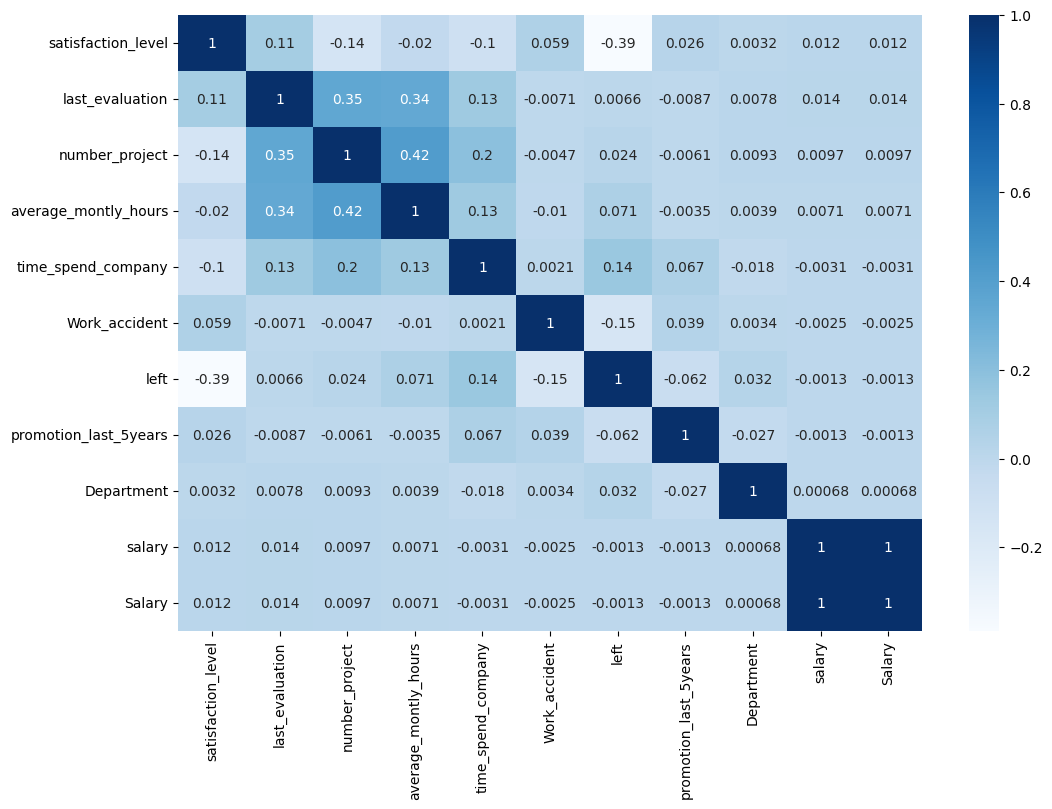

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues')
# since we can see for the left column all has a weak correaltion it only has strong negative correaltion with satisfactory which mean if satisfaction is low then he will leave
# to be a good model the correlation should be at least 0.8 it should indicate strong correlation . as its weak in this case therefore we have a bad model

###Strong Correlation - (0.8 to 1 )
Weak Correlation
